# Exploratory Data Analysis for Solar Radiation Data
## 1. Import Libraries

In [49]:
import sys
import os
notebook_dir = os.getcwd()  # Get current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, '..'))  # Go up one level
scripts_dir = os.path.join(project_dir, 'scripts')  # Path to scripts
sys.path.append(scripts_dir)


In [51]:
# Import necessary libraries
import pandas as pd
from utils import (
    load_data, convert_timestamp_to_index, report_negative_values,
    replace_negative_with_median, detect_outliers, plot_outliers, data_overview,
    plot_wind_vs_ghi, plot_rh_vs_tamb, plot_rh_vs_dhi, plot_wind_direction,
    plot_histograms, plot_rh_vs_variables, plot_bubble_charts, plot_monthly_trends,
    plot_daily_trends, plot_cleaning_impact, plot_correlation_heatmap,plot_time_series,replace_outliers_with_mean
)

## 2. Importing Data

In [54]:
# Load data
df = load_data('../data/benin-malanville.csv')

## Summary Statistics and Missing-Value Report

In [57]:
# Display data overview
overview = data_overview(df)
print("Shape:", overview['shape'])
print("\nData Types:")
for col, dtype in overview['dtypes'].items():
    print(f"{col}: {dtype}")
print("\nSummary Statistics:")
print(pd.DataFrame(overview['describe']))
print("\nMissing Values:")
print(pd.Series(overview['missing_values']))
df.select_dtypes(include='number').describe()

Shape: (525600, 19)

Data Types:
Timestamp: object
GHI: float64
DNI: float64
DHI: float64
ModA: float64
ModB: float64
Tamb: float64
RH: float64
WS: float64
WSgust: float64
WSstdev: float64
WD: float64
WDstdev: float64
BP: int64
Cleaning: int64
Precipitation: float64
TModA: float64
TModB: float64
Comments: float64

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb       

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [59]:
missing_percent = df.isna().mean() * 100
null_column_percentage = missing_percent[missing_percent > 5]
null_column_percentage

Comments    100.0
dtype: float64

## Outlier Detection & Basic Cleaning

### 1. Negative values

In [63]:
# Report negative values
negatives = report_negative_values(df)
for col, (count, percentage) in negatives.items():
    print(f"Column {col} has {count} negative values and {percentage}% of the data")

Column GHI has 258847 negative values and 49.25% of the data
Column DNI has 275987 negative values and 52.51% of the data
Column DHI has 259182 negative values and 49.31% of the data


### Action

In [66]:
# Replace negative values with median
df = replace_negative_with_median(df)

### 2. Outliers

In [69]:
# Detect and report outliers
outliers = detect_outliers(df)
for col, (count, percentage, _) in outliers.items():
    print(f"Column {col} has {count} outliers and {percentage}% of the data")

Column ModA has 27 outliers and 0.01% of the data
Column ModB has 63 outliers and 0.01% of the data
Column WS has 3109 outliers and 0.59% of the data
Column WSgust has 3500 outliers and 0.67% of the data


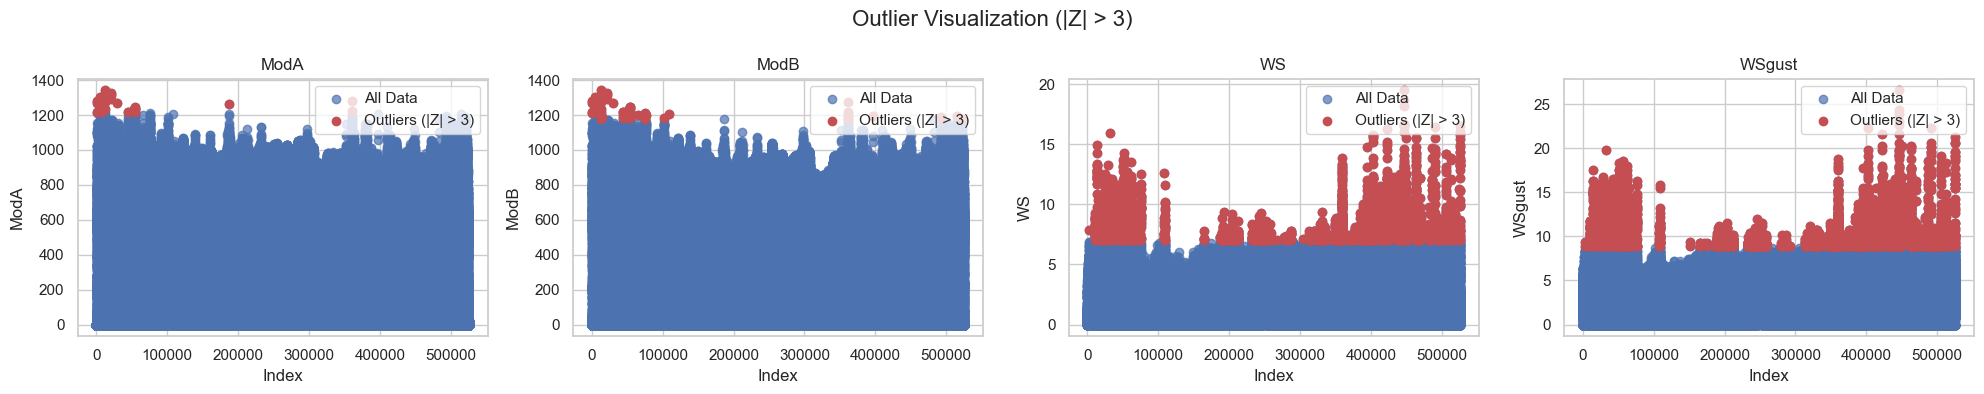

In [71]:
# Plot outliers
plot_outliers(df)

### Action

In [74]:
## Replace Outlier values with mean value of the column
cols = ['ModA', 'ModB', 'WS', 'WSgust']
df = replace_outliers_with_mean(df,cols)

Replaced 27 outliers in column 'ModA' with mean 236.54
Replaced 63 outliers in column 'ModB' with mean 228.76
Replaced 3109 outliers in column 'WS' with mean 2.08
Replaced 3500 outliers in column 'WSgust' with mean 2.76


In [76]:
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      475.492396     348.965279     222.224081     236.536448   
std       228.385103     193.441746     107.493717     326.810945   
min         0.000000       0.000000       0.000000       0.000000   
25%       464.700000     345.700000     210.700000       0.000000   
50%       474.200000     345.700000     213.400000       4.500000   
75%       483.400000     345.700000     216.300000     463.600000   
max      1413.000000     952.300000     759.200000    1215.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.764065      28.179683      54.487969       2.083517   
std       316.347871       5.924297      28.073069       1.521833   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.600000      32.300000      80.100000       3.000000   
max      1177.000000      43.800000     100.000000       6.900000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.755926       0.473390     153.435172       8.582407   
std         1.912856       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         3.900000       0.600000     235.100000      12.300000   
max         8.700000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

## Remove Columns

In [79]:
df.drop('Comments',  axis=1, inplace=True)

## Save Data

In [82]:
df.to_csv('../data/benin_clean.csv', index=False)

## Time Series Analysis

In [23]:
# Convert Timestamp to datetime index
df = convert_timestamp_to_index(df)
print(f"Index type after conversion: {type(df.index)}")  

Index type after conversion: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


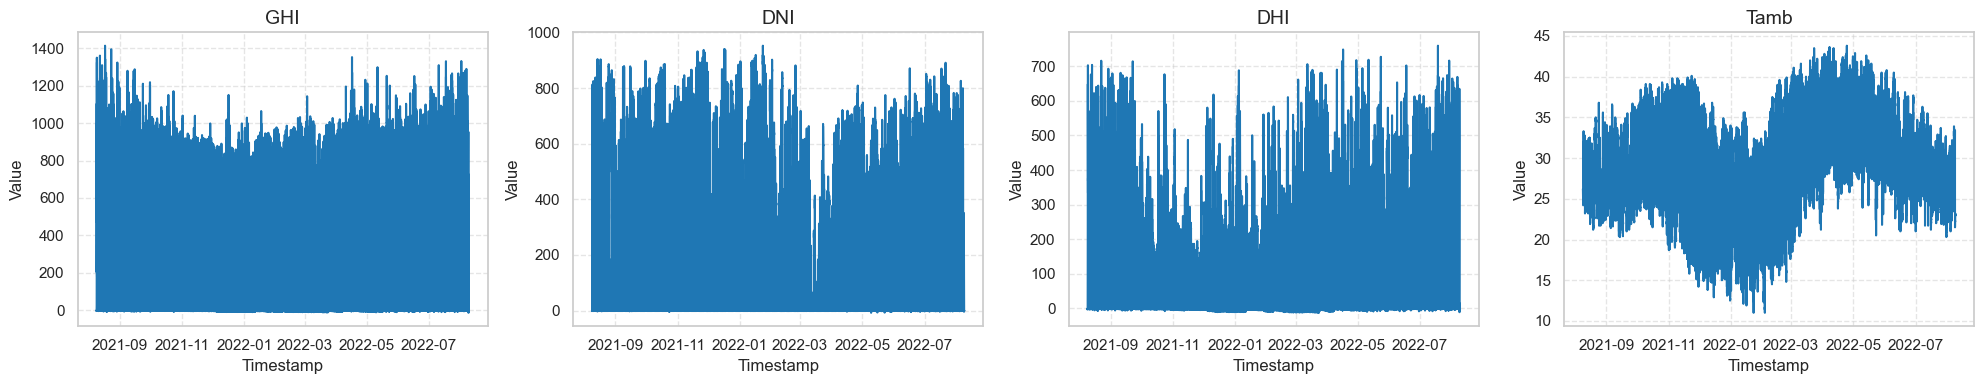

In [25]:
# Plot time series for GHI, DNI, DHI, Tamb
plot_time_series(df)

## Time Series Patterns by Month

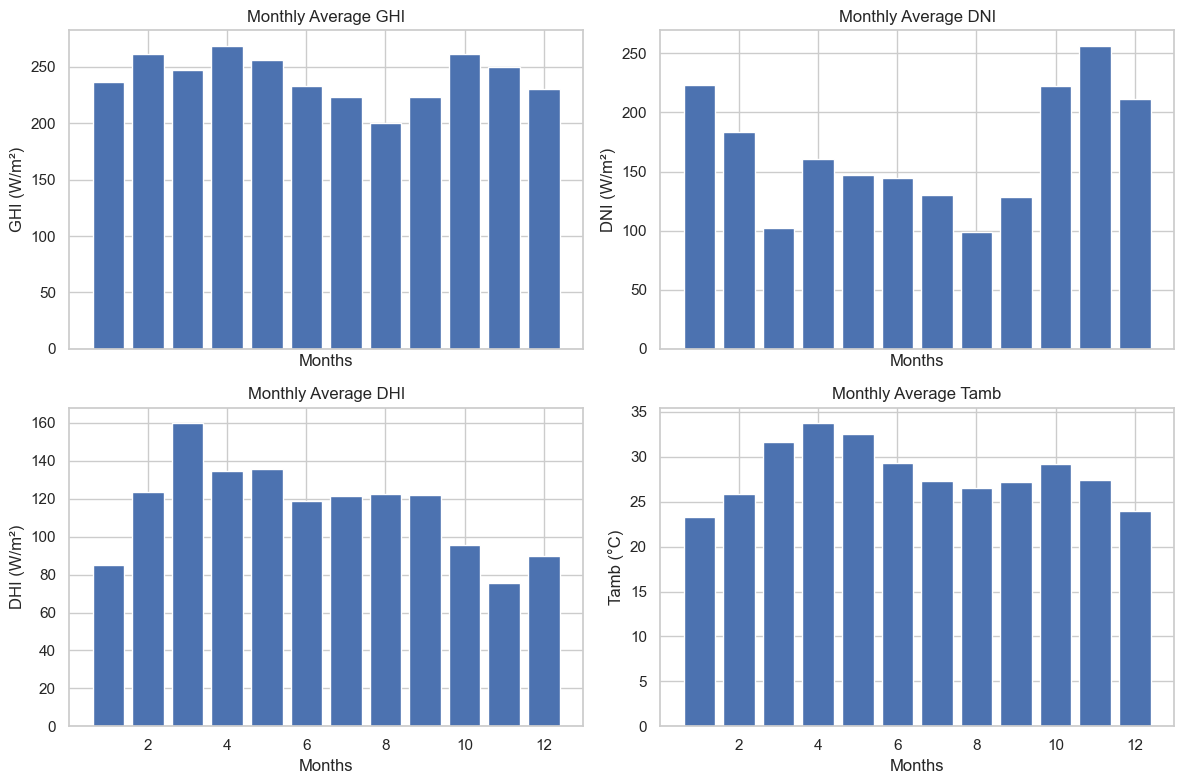

In [28]:
# Plot monthly trends
plot_monthly_trends(df)

## Daily Time Series Patterns

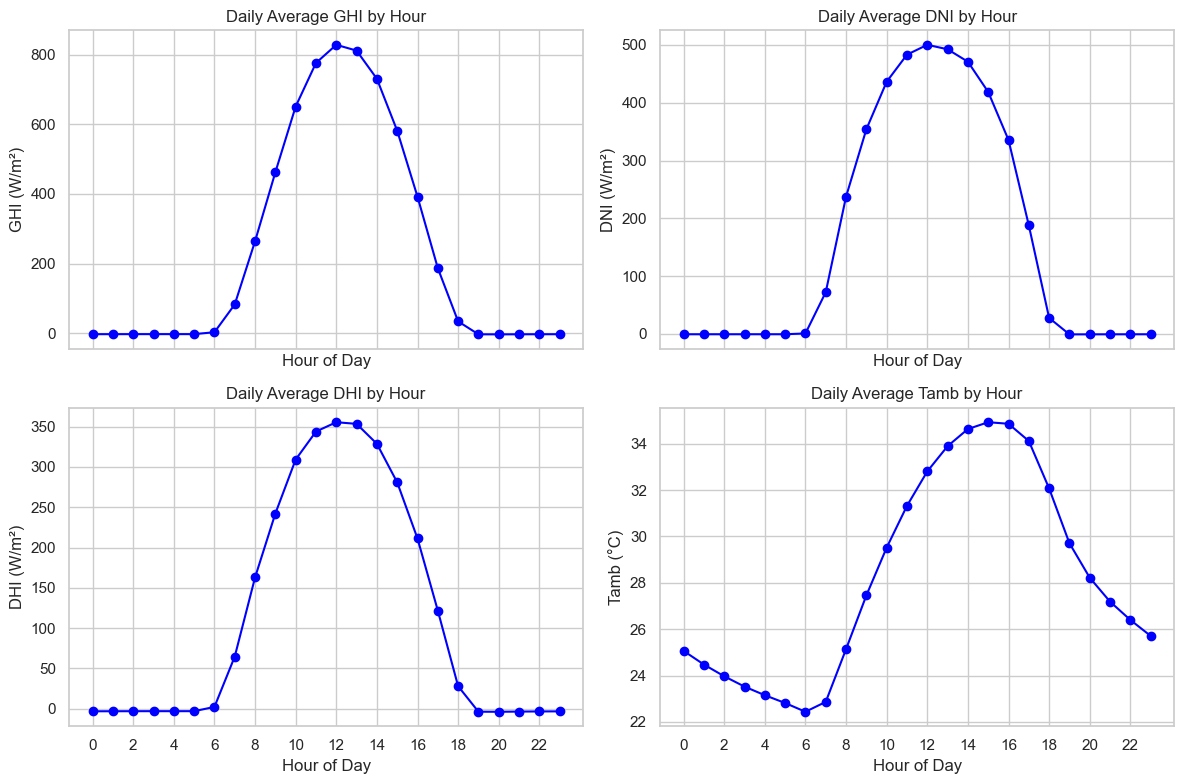

In [31]:
# Plot daily trends
plot_daily_trends(df)

## Cleaning Impact

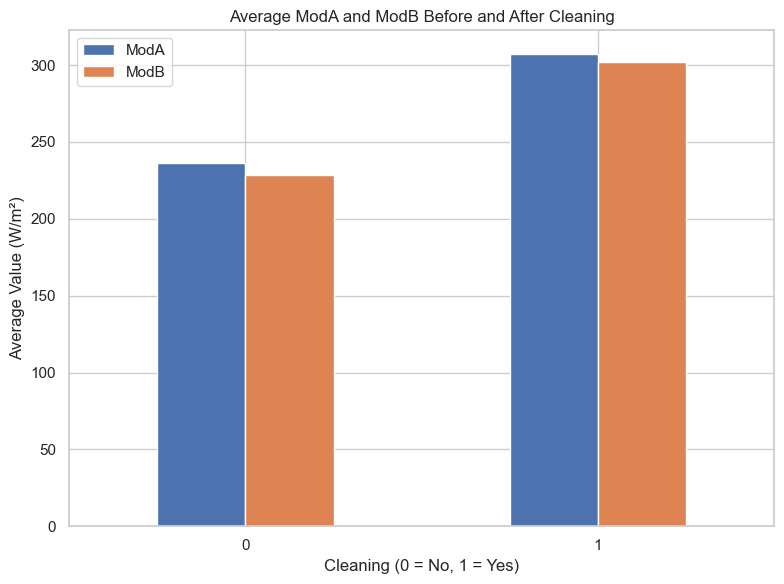

In [56]:
# Plot cleaning impact
plot_cleaning_impact(df)

## Correlation & Relationship Analysis

### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

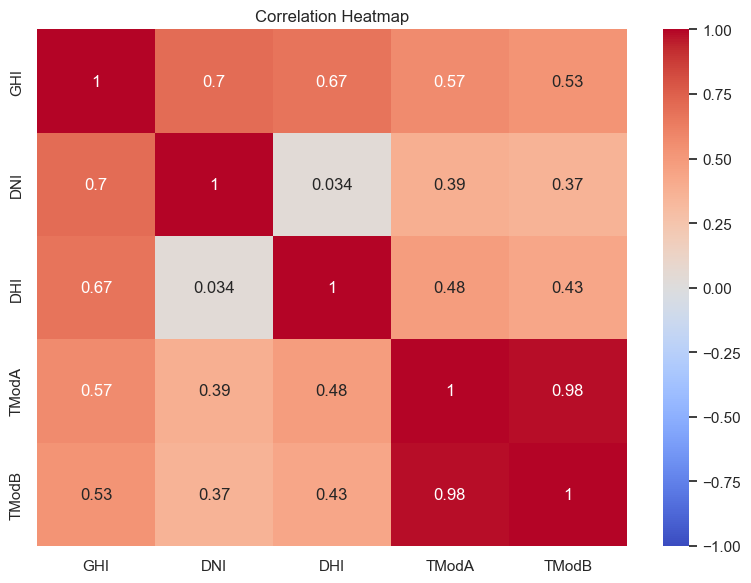

In [58]:
# Plot correlation heatmap
plot_correlation_heatmap(df)

### Scatter plots: WS, WSgust, WD vs. GHI

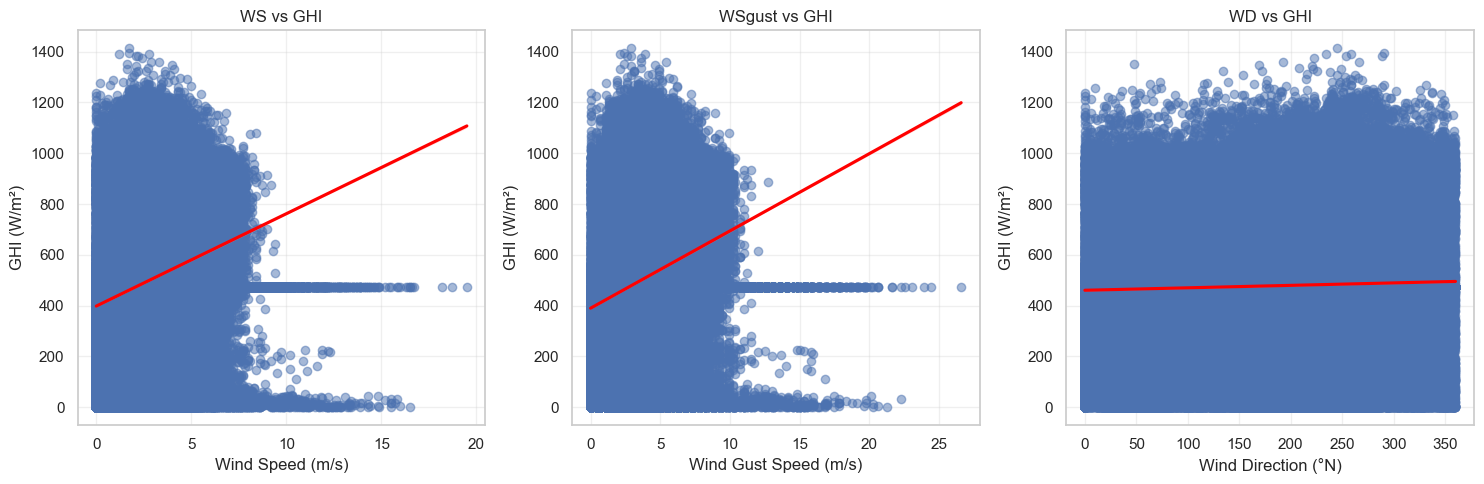

In [61]:
# Plot wind-related variables vs. GHI
plot_wind_vs_ghi(df)

### RH vs. Tamb

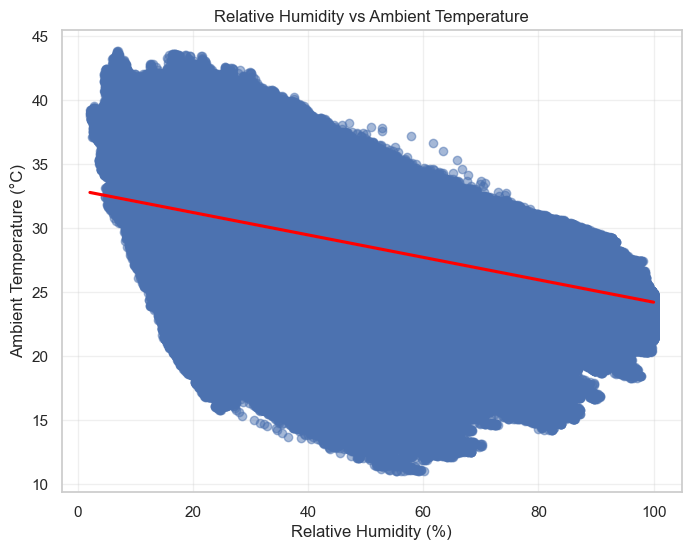

In [65]:
# Plot Relative Humidity vs. Ambient Temperature
plot_rh_vs_tamb(df)

###  RH vs. GHI

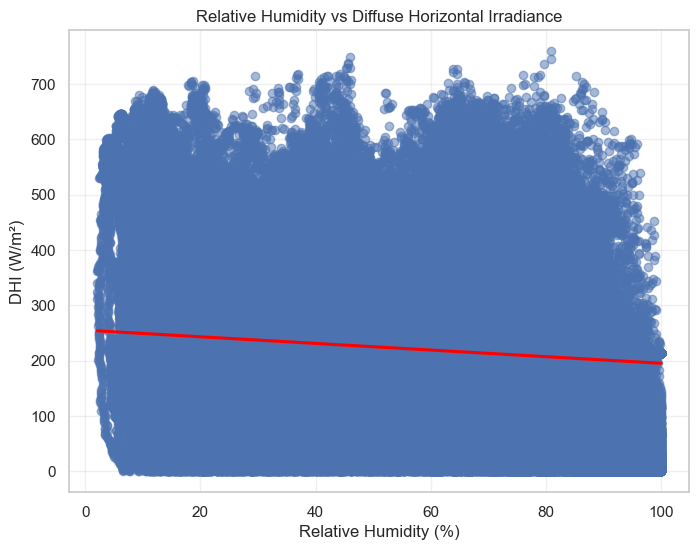

In [67]:
# Plot Relative Humidity vs. Diffuse Horizontal Irradiance
plot_rh_vs_dhi(df)

## Wind & Distribution Analysis

### Radial bar plot of WS/WD.

C:\Users\hp\Documents\10\solar-challenge-week1\scripts\utils.py:413: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_speed = df.groupby('WD_bin')['WS'].mean()


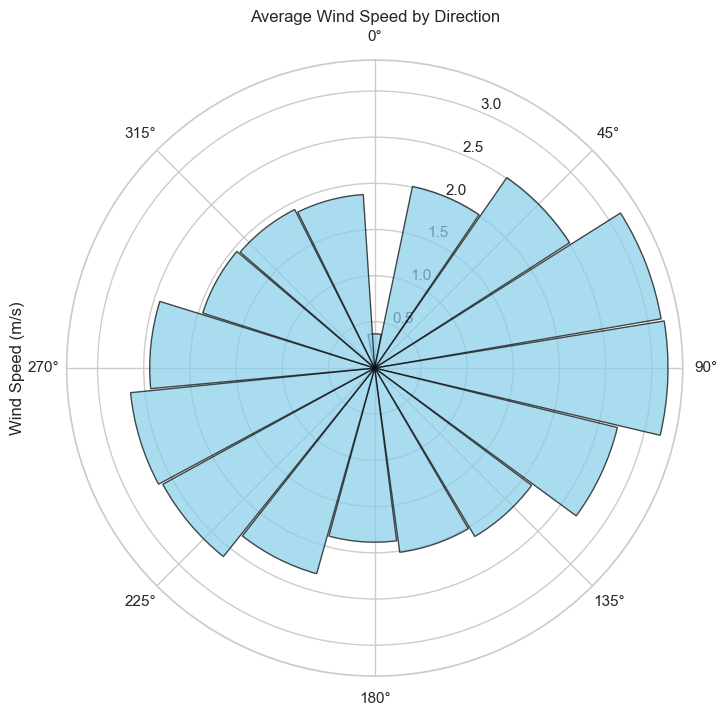

In [70]:
# Plot wind direction analysis
plot_wind_direction(df)

### Histograms for GHI and one other variable (e.g. WS).

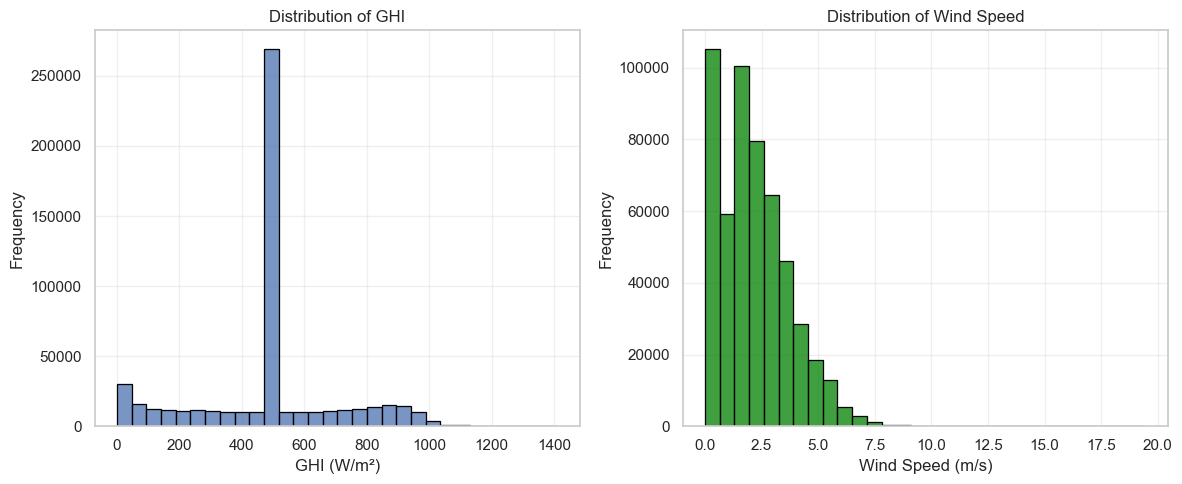

In [72]:
# Plot histograms for GHI and WS
plot_histograms(df)

## Temperature Analysis

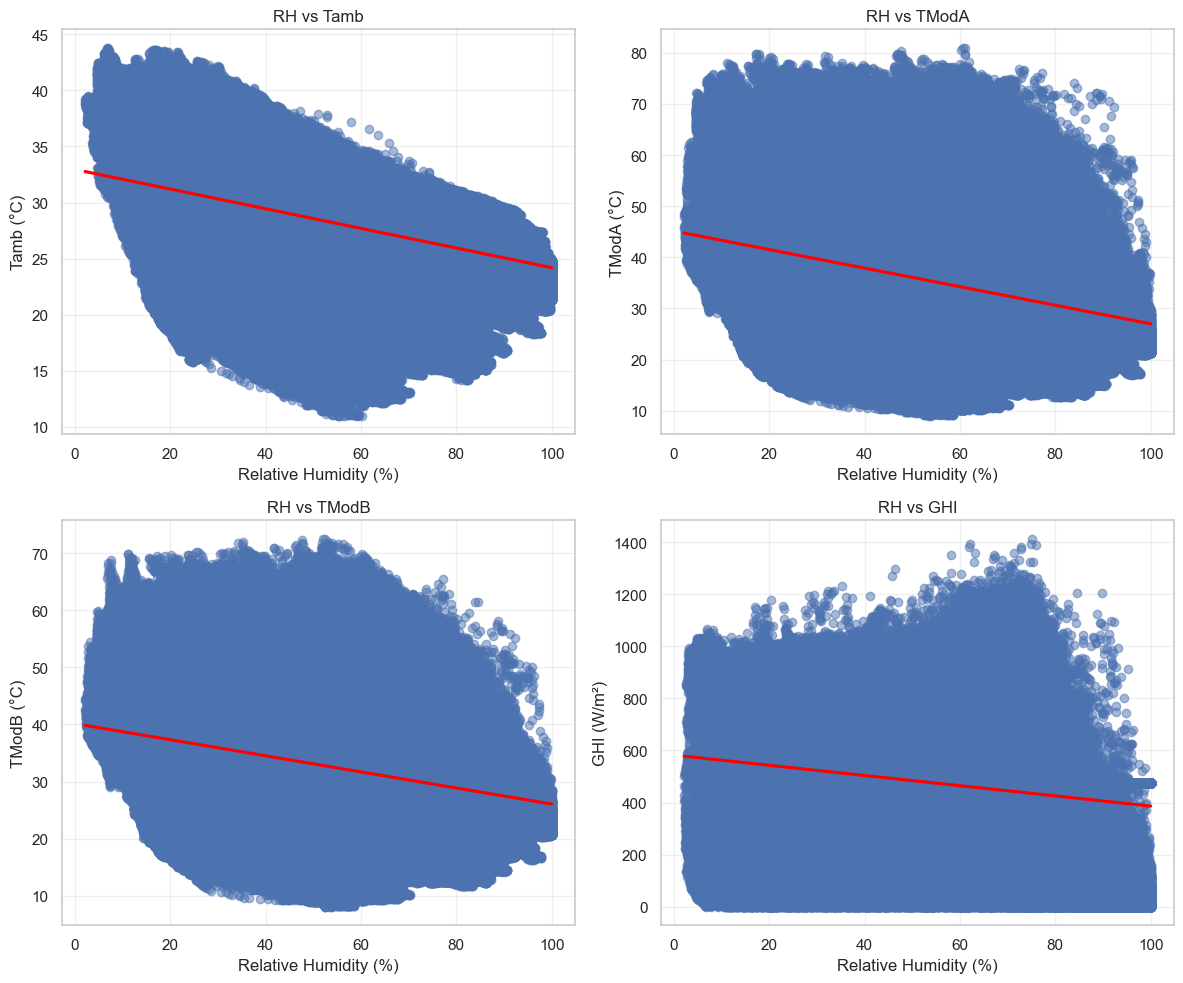

In [74]:

# Plot RH vs. multiple variables
variables = ['Tamb', 'TModA', 'TModB', 'GHI']
units = ['°C', '°C', '°C', 'W/m²']
plot_rh_vs_variables(df, variables, units)


### Bubble Chart


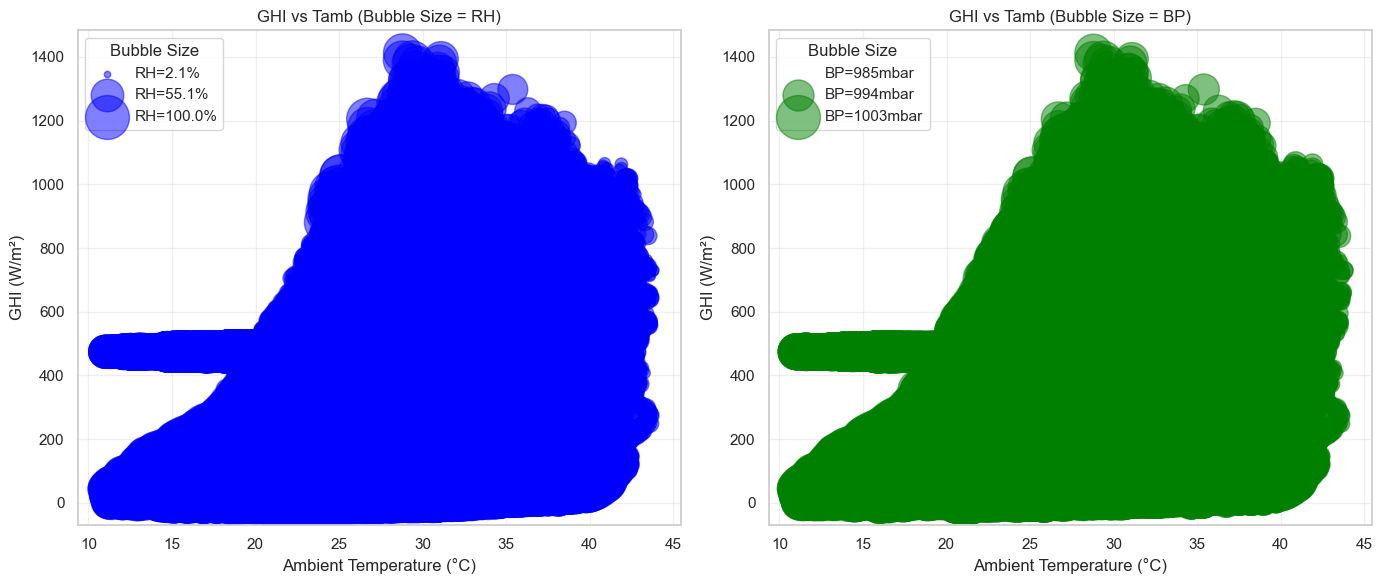

In [76]:
# Plot bubble charts
plot_bubble_charts(df)